In [1]:
import pandas as pd
df = pd.read_csv('fcb_xg.csv')

In [2]:
df

,Date,Time,GF,GA,xG,xGA
0,2019-08-16,21:00 (00:30),0,1,1.1,0.5
1,2019-08-25,21:00 (00:30),5,2,2.0,0.2
2,2019-08-31,17:00 (20:30),2,2,0.5,1.6
3,2019-09-14,21:00 (00:30),5,2,2.0,1.3
4,2019-09-17,21:00 (00:30),0,0,0.6,2.6
5,2019-09-21,21:00 (00:30),0,2,0.5,1.7
6,2019-09-24,21:00 (00:30),2,1,0.7,0.7
7,2019-09-28,16:00 (19:30),2,0,1.4,0.7
8,2019-10-02,21:00 (00:30),2,1,1.2,1.1
9,2019-10-06,21:00 (00:30),4,0,2.4,1.8


In [3]:
#change this cell to drive the whole IPYNB
graph_var1= 'GA'
graph_var2= 'xGA'
pand_out1 = 'RollingGA'
pand_out2 = 'RollingxGA'
hue_disp1 = 'GA vs xGA'
hue_disp2 = 'GA and xGA'

In [4]:
def movavg(pandas_df,col1,col2,out1,out2):    
    pandas_df['X_axis'] = df.index
    for i in range(0,pandas_df.shape[0] - 4):
        pandas_df.loc[pandas_df.index[i+4],out1] = (pandas_df.iloc[i][col1] + pandas_df.iloc[i+1][col1] + pandas_df.iloc[i+2][col1] + pandas_df.iloc[i + 3][col1] + pandas_df.iloc[i+4][col1])/5
        pandas_df.loc[pandas_df.index[i+4],out2] = (pandas_df.iloc[i][col2] + pandas_df.iloc[i+1][col2] + pandas_df.iloc[i+2][col2] + pandas_df.iloc[i + 3][col2] + pandas_df.iloc[i+4][col2])/5
    
    return pandas_df[['X_axis',out1,out2]]

In [5]:
main_df = movavg(df,graph_var1,graph_var2,pand_out1,pand_out2)

In [6]:
main_df.head()

,X_axis,RollingGA,RollingxGA
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,1.4,1.24


In [7]:
def melt(pandas_df,x_axis):
    pandas_df = pandas_df.melt(x_axis,var_name=hue_disp1, value_name=hue_disp2)
    return pandas_df

In [8]:
df_for_disp = melt(main_df,'X_axis')

In [9]:
df_for_disp.head()

,X_axis,GA vs xGA,GA and xGA
0,0,RollingGA,NaN
1,1,RollingGA,NaN
2,2,RollingGA,NaN
3,3,RollingGA,NaN
4,4,RollingGA,1.4


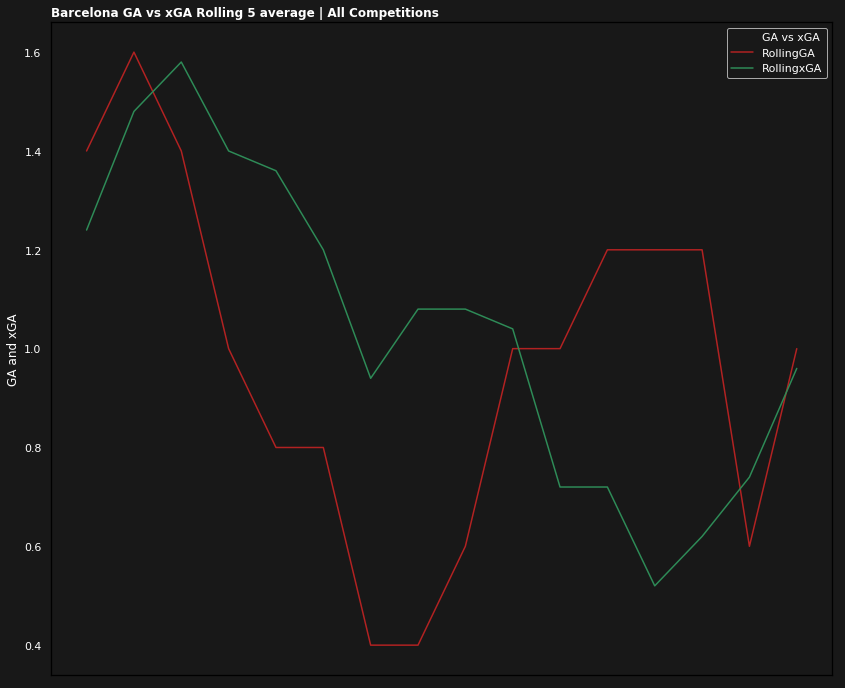

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (14 ,12)
bg = "#181818"

flatui = flatui = ["firebrick", "seagreen"]
palette = sns.color_palette(flatui)
sns.set(rc={ 'grid.color': '#5c5b5b','grid.linestyle': ' ','axes.edgecolor': '#000000','axes.facecolor':bg, 'figure.facecolor':bg,'ytick.color':'white','xtick.color':'white' ,'axes.labelcolor': 'white','text.color': 'white'})
fig, ax = plt.subplots(figsize=a4_dims)
#with plt.xkcd():
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
plt.title('Barcelona ' + hue_disp1 + ' Rolling 5 average | All Competitions',loc = 'left',color='white',weight = 'semibold')

ax = sns.lineplot(x='X_axis', y=hue_disp2,hue=hue_disp1, data=df_for_disp,palette = palette)